# What Causes Traffic On Interstate 94?
## The goal of my analysis is to determine common indicators of heavy traffic on I-94.

>

### 1/5 Let's Read The Data & Review It.

In [1]:
import pandas as pd
Interstate_94_Data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

Interstate_94_Data.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
Interstate_94_Data.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
Interstate_94_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Note:

The dataset has 48,204 rows and 9 columns,
and there are no null values.
Each row describes traffic and weather data for a specific hour —
we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

A station located approximately midway between Minneapolis and Saint Paul,
records the traffic data (see the dataset documentation).
For this station,
the direction of the route is westbound 
(i.e., cars moving from east to west).

This means that the results of our analysis
will be about the westbound traffic in the proximity of the station. 

In other words,
we should avoid generalizing our results for the entire I-94 highway.

### 2/5 Analyzing Traffic Volume.

(array([8089., 5102., 2839., 4753., 4770., 4342., 7888., 5636., 3857.,
         928.]),
 array([   0.,  728., 1456., 2184., 2912., 3640., 4368., 5096., 5824.,
        6552., 7280.]),
 <BarContainer object of 10 artists>)

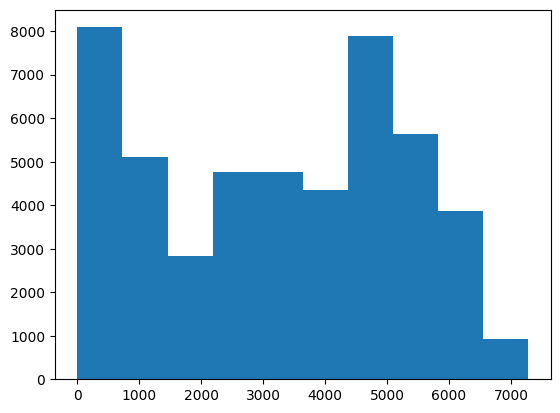

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(Interstate_94_Data['traffic_volume'])

In [5]:
Interstate_94_Data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Note:

The hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.
75% of the data points are less than or equal to 4933.

In [6]:
Interstate_94_Data['date_time'] = pd.to_datetime(Interstate_94_Data['date_time'])

In [7]:
Interstate_94_Data['date_time'] = pd.to_datetime(Interstate_94_Data['date_time'])

day = Interstate_94_Data.copy()[(Interstate_94_Data['date_time'].dt.hour >= 7) & (Interstate_94_Data['date_time'].dt.hour < 19)]
print(day.shape)

night = Interstate_94_Data.copy()[(Interstate_94_Data['date_time'].dt.hour >= 19) | (Interstate_94_Data['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


Text(0.5, 1.0, 'Day - Left Skewed, most of the values are high.')

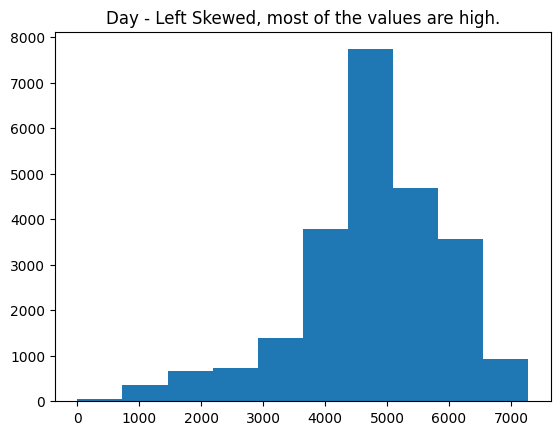

In [8]:
plt.hist(day['traffic_volume'])
plt.title("Day - Left Skewed, most of the values are high.")

Text(0.5, 1.0, 'Night - Right Skewed, most of the values are low.')

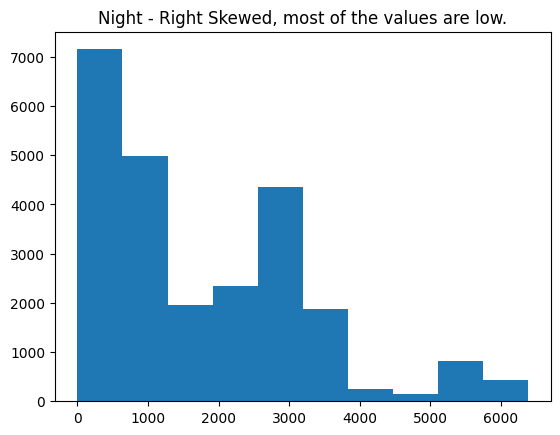

In [9]:
plt.hist(night['traffic_volume'])
plt.title("Night - Right Skewed, most of the values are low.")

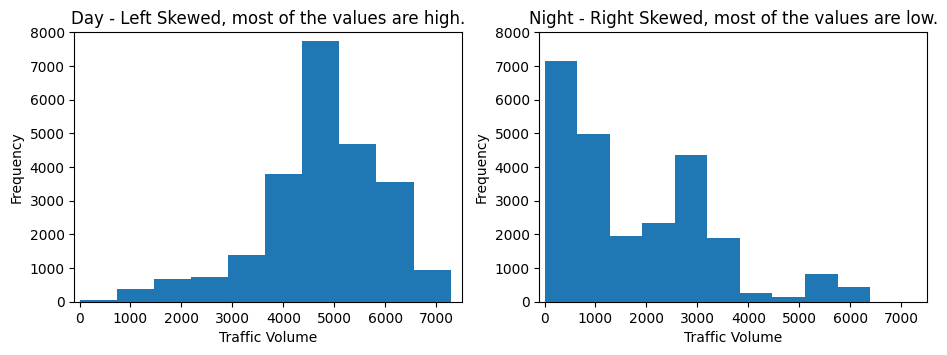

In [10]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title("Day - Left Skewed, most of the values are high.")
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title("Night - Right Skewed, most of the values are low.")
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

### Note:

After review the 2 plots of traffic volume frequency, you can the difference between Day and Night.

i mean: Day - Left Skewed, most of the values are high

In [11]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

### Conclusion:

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

### 3/5 Is it some certain Month, Day or Time of Day that we have traffic ?

#### Analyze Months

In [13]:
day['month'] = day['date_time'].dt.month

In [14]:
by_month = day.groupby('month').mean(numeric_only=True)

In [15]:
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

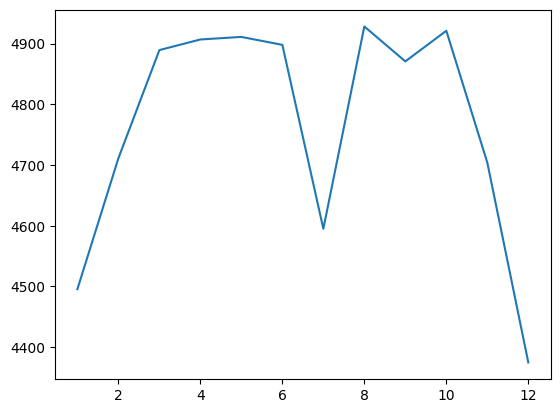

In [16]:
plt.plot(by_month['traffic_volume'])

#### Note:

We can see at the line plot above, that in Juny till July low heavy, October till December/Januar there is low traffic which is cold months. 

#### Is there anything special about July?

<Axes: xlabel='year'>

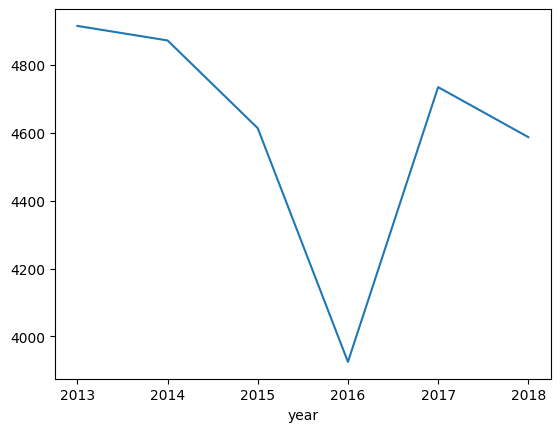

In [17]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month']==7]
only_july.groupby('year').mean(numeric_only=True)['traffic_volume'].plot.line()


Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction —  [this article from 2016 supports](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

#### Analyze Days

In [18]:
day['dayofweek'] = day['date_time'].dt.dayofweek

In [19]:
by_dayofweek = day.groupby('dayofweek').mean(numeric_only=True)

In [20]:
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

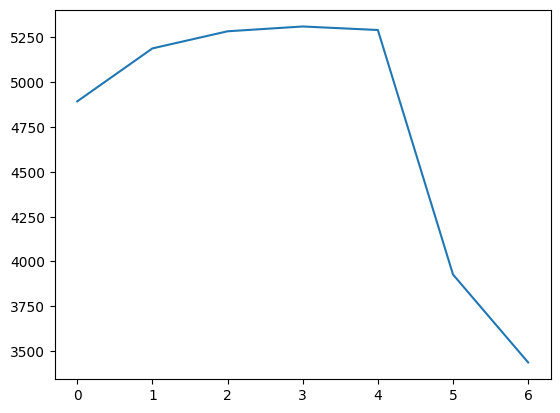

In [21]:
plt.plot(by_dayofweek['traffic_volume'])

#### Note:

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

Traffic: in Days (not nights), in Warm months, in business days (Sun-Sat).

#### Analyze Time of day

In [22]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4]
weekend = day.copy()[day['dayofweek'] >= 4]
by_hour_business = business_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

In [23]:
print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     3042.782609
8     3321.670416
9     3684.515081
10    3983.360412
11    4347.832134
12    4650.061520
13    4630.925121
14    4714.427184
15    4806.988957
16    4902.709906
17    4608.627521
18    4087.150121
Name: traffic_volume, dtype: float64


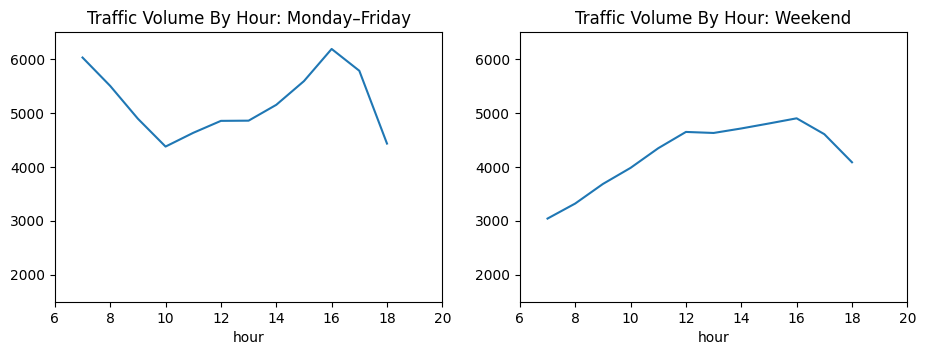

In [24]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

### 4/5 How weather affect the Traffic Volume ?

let's try to find correlation.

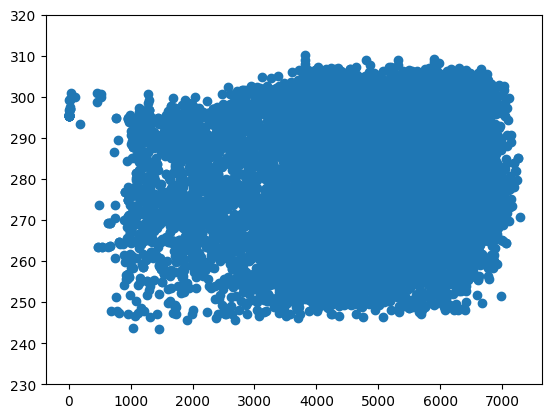

In [25]:
plt.scatter(day['traffic_volume'], day['temp'])
plt.ylim(230, 320)
plt.show()

We can notice, there is no clear correlation.

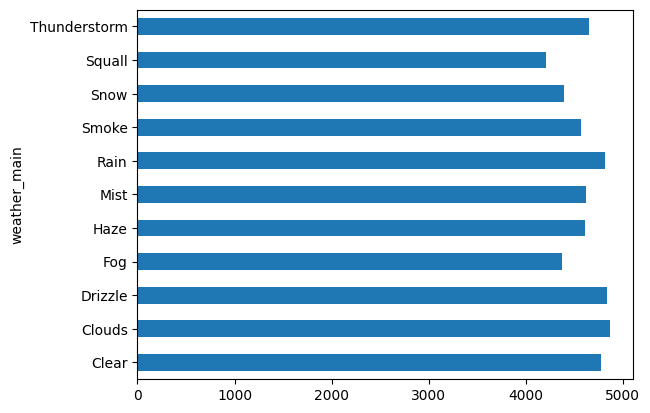

In [32]:
by_weather_main = day.groupby('weather_main').mean(numeric_only=True)
by_weather_main['traffic_volume'].plot.barh()
plt.show()

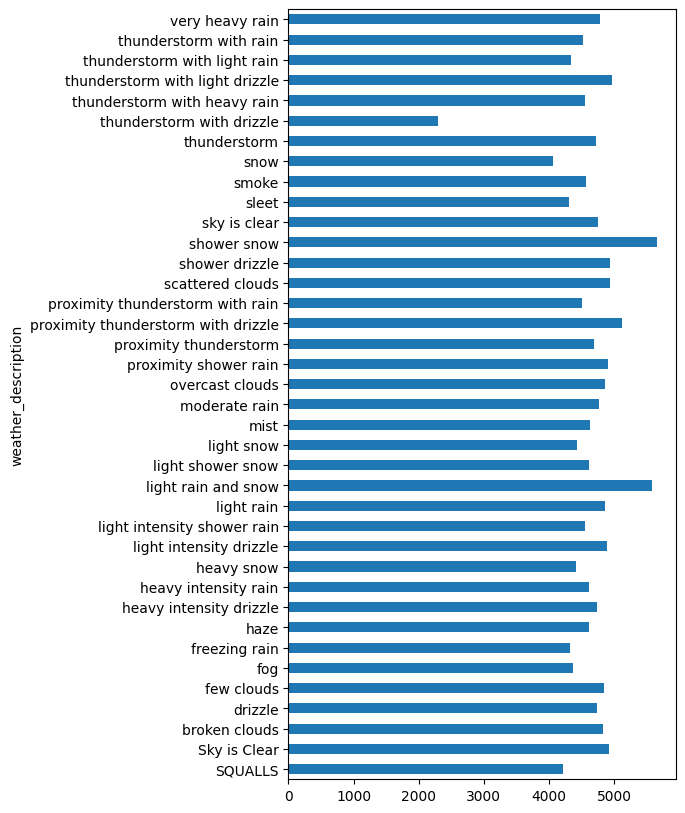

In [38]:
by_weather_description = day.groupby('weather_description').mean(numeric_only=True)
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

In those condition there is more than 5,000 cars in the roads
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

### 5/5 Final conclusions:

In this project, I tried to find out what are the main reasons that cause the traffic. I found that the most and the highest traffic happens in Worm Months in Business Days during the Day hours (not night) specifically at 7:00 and 16:00, it’s mean when drivers go to their work and return to their home. 
Also, finally I saw that in those types of weather: Shower snow, Light rain snow, Proximity thunderstorm with drizzle. we can see more cars (more than 5,000). 

My target (Y): traffic_volume.

Thank you, Best Wishes, Nour:)